In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
data = pd.read_csv("cleanData/data.csv")
y = pd.read_csv("cleanData/y.csv", header = None)
y = y[0]

In [3]:
# Logistic Regression
lr = LogisticRegression(random_state = randomState)
train_sizes, train_scores, test_scores = learning_curve(estimator = lr, 
                                                        X = data, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)

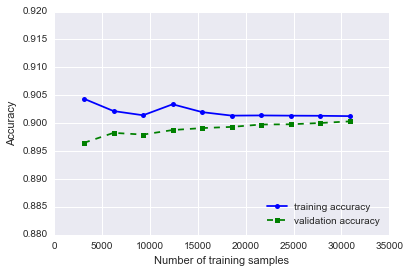

In [4]:
# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [5]:
print("Accuracy with full training : " + str(test_means[9]))
print("Our model performs quite well, predicting correctly who will suscribe a term deposit more than 90% of the time") 
print("Very few overfitting as long as we train on 20K+ samples") 

Accuracy with full training : 0.900320481694
Our model performs quite well, predicting correctly who will suscribe a term deposit more than 90% of the time
Very few overfitting as long as we train on 20K+ samples


In [6]:
# Plotting accuracy as a function of the model parameter C
param_range = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
train_scores, test_scores = validation_curve(estimator = lr, 
                                             X = data, 
                                             y = y,
                                             param_name = "C", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)


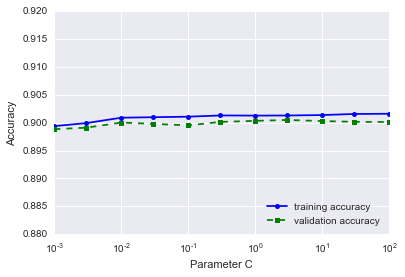

In [7]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [8]:
print(np.mean(test_scores, axis = 1))
print("We obtain best score, and no overfitting, for C = 3") 

[ 0.8988249   0.89909682  0.90000971  0.89977663  0.89950471  0.90012625
  0.90032048  0.90047587  0.90028164  0.90014567  0.90010683]
We obtain best score, and no overfitting, for C = 3


In [9]:
# Let's get validation accuracy with updated parameter
lr = LogisticRegression(random_state = randomState, C = 3)
scores = cross_val_score(estimator = lr, 
                         X = data, 
                         y = y, 
                         cv = ShuffleSplit(n_splits = 5, 
                                           test_size = 0.25, 
                                           random_state = randomState), 
                         n_jobs = njobs)
print("Accuracy : " + str(np.mean(scores)))

Accuracy : 0.900475866757


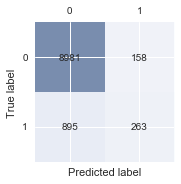

In [10]:
# Plotting the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = randomState)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.5)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) : 
        ax.text(x = j, y = i, s = confmat[i, j], va = "center", ha = "center")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [13]:
print("Our errors are mostly false positives (895 out of 1053)")

Our errors are mostly false positives (895 out of 1053)


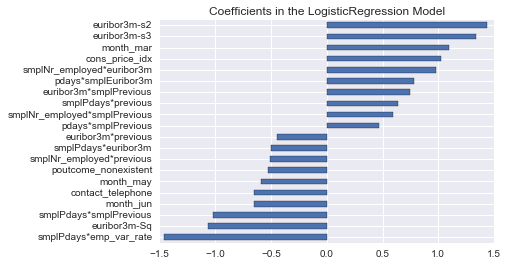

In [18]:
# Get the coefficients to see the most important features
coefs = pd.Series(lr.coef_[0], index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the LogisticRegression Model")

In [19]:
print("1* Most of the most important features in the RF model are features we created")
print("2* Some results look weird and might just overfit, like 'contact_telephone', which shouldn't have a negative impact")

1* Most of the most important features in the RF model are features we created
2* Some results look weird and might just overfit, like 'contact_telephone', which shouldn't have a negative impact
